In [2]:
import pandas as pd
import numpy as np

In [3]:
path = "/content/Trading-features.csv"
Data = pd.read_csv(path)
display(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 164 entries, id to f161
dtypes: float64(136), int64(27), object(1)
memory usage: 12.5+ MB


None

In [4]:
display(Data.describe())
# Data.info

,id,last_price,f1,f2,f3,f4,f5,f6,f7,f8,...,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161
count,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.546190e+07,42938.580560,0.000414,20149.80990,-40.236010,42.252370,2.016360,0.523120,1.103560,2.29049,...,533.201440,-74.606490,533.201440,-74.606490,-74.606490,533.201440,533.201440,-74.606490,-74.606490,533.201440
std,2.890879e+03,205.486455,0.000018,2897.95985,7.212493,9.346334,5.339766,12.883223,17.590602,24.03562,...,177.929894,46.736091,177.929894,46.736091,46.736091,177.929894,177.929894,46.736091,46.736091,177.929894
min,5.545690e+07,42659.500000,0.000397,15139.00000,-57.800000,15.000000,-27.100000,-51.900000,-59.900000,-75.70000,...,301.200000,-196.300000,301.200000,-196.300000,-196.300000,301.200000,301.200000,-196.300000,-196.300000,301.200000
25%,5.545940e+07,42747.400000,0.000400,17642.00000,-46.000000,35.700000,0.000000,-5.600000,-8.300000,-11.00000,...,359.100000,-104.825000,359.100000,-104.825000,-104.825000,359.100000,359.100000,-104.825000,-104.825000,359.100000
50%,5.546190e+07,42835.850000,0.000408,20146.00000,-38.200000,40.500000,0.800000,0.000000,0.100000,0.40000,...,450.800000,-61.200000,450.800000,-61.200000,-61.200000,450.800000,450.800000,-61.200000,-61.200000,450.800000
75%,5.546441e+07,43145.225000,0.000417,22652.25000,-34.500000,48.500000,3.900000,5.725000,8.800000,12.20000,...,712.325000,-37.700000,712.325000,-37.700000,-37.700000,712.325000,712.325000,-37.700000,-37.700000,712.325000
max,5.546691e+07,43262.000000,0.000463,25196.00000,-22.100000,124.200000,85.300000,135.000000,135.700000,179.00000,...,831.300000,49.400000,831.300000,49.400000,49.400000,831.300000,831.300000,49.400000,49.400000,831.300000


In [5]:
print(Data.shape)
print(Data.columns)

(10000, 164)
Index(['id', 'last_price', 'created_at', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6',
       'f7',
       ...
       'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160',
       'f161'],
      dtype='object', length=164)


In [6]:
from copy import deepcopy
# # Getting usefull features from time
Data['created_at'] = pd.to_datetime(Data['created_at'])
date_forplotting = deepcopy(Data['created_at'])
Data['hour'] = Data['created_at'].dt.hour
Data['minute'] = Data['created_at'].dt.minute
Data['second'] = Data['created_at'].dt.second

Data.drop('created_at', axis=1, inplace=True)
print(Data.shape)
print(Data.columns)

(10000, 166)
Index(['id', 'last_price', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',
       ...
       'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'hour',
       'minute', 'second'],
      dtype='object', length=166)


In [7]:
#Removing features with zero values
zero= Data.columns[Data.sum(axis=0) == 0]
print(zero)
Data.drop(zero, axis=1, inplace=True)
print(Data.shape)
print(Data.columns)

Index(['f24', 'f47', 'f50', 'f61', 'f63', 'f65', 'f67', 'f69', 'f71', 'f73',
       'f75'],
      dtype='object')
(10000, 155)
Index(['id', 'last_price', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',
       ...
       'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'hour',
       'minute', 'second'],
      dtype='object', length=155)


In [8]:
import pandas as pd
from sklearn.impute import SimpleImputer

missing_values = Data.isna().sum()
col = missing_values[missing_values > 0].index.tolist()
print(col)

imputer = SimpleImputer(strategy='mean')
for i in col:
  Data[i] = imputer.fit_transform(Data[[i]])


['f48', 'f49', 'f62', 'f64', 'f66', 'f68', 'f70', 'f72', 'f74', 'f76', 'f101', 'f106', 'f108', 'f110', 'f121']


In [9]:
#Check if there are any empty value left
missing_values = Data.isna().sum()
col = missing_values[missing_values > 0].index.tolist()
print(col)
print(Data.shape)
print(Data.columns)

[]
(10000, 155)
Index(['id', 'last_price', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',
       ...
       'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'hour',
       'minute', 'second'],
      dtype='object', length=155)


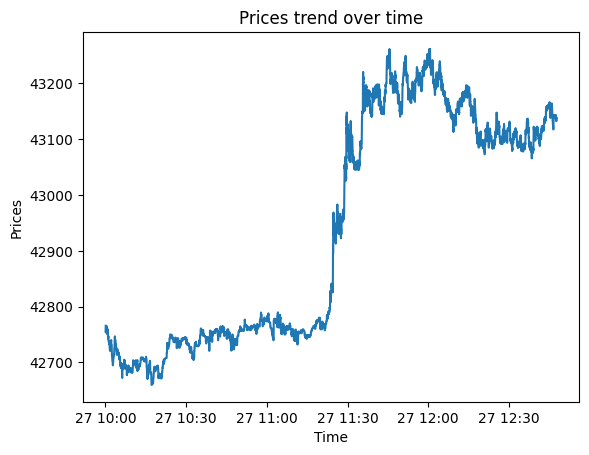

In [10]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has columns 'x' and 'y'
plt.plot(date_forplotting, Data['last_price'])
plt.title('Prices trend over time')
plt.xlabel('Time')  # Replace with your x-axis label
plt.ylabel('Prices')  # Replace with your y-axis label
plt.show()


In [11]:
Data['shifted_column'] = Data['last_price'].shift(-1)
Data['positive_shift'] = (Data['last_price'] > Data['shifted_column']).astype(int)
# Drop the temporary shifted column
Data.drop('shifted_column', axis=1, inplace=True)

In [12]:
# Y = Data['last_price']
# X = Data.drop('last_price', axis=1, inplace=False)
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# print(X.shape)
# print(Y.shape)

In [14]:
# # Using Linear Regression model for training
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split


# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# test_score = model.score(X_test, y_test)
# train_score = model.score(X_train, y_train)
# print(f"Training accuracy : {train_score*100:.2f}%\nTesting accuracy : {test_score*100:.2f}%")


In [15]:
# from sklearn.svm import SVR
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# svr_model = SVR()

# svr_model.fit(X_train_scaled, y_train)
# y_pred2 = svr_model.predict(X_test_scaled)
# test_score = svr_model.score(X_test_scaled, y_test)
# train_score = svr_model.score(X_train_scaled, y_train)
# print(f"Training accuracy : {train_score*100:.2f}%\nTesting accuracy : {test_score*100:.2f}%")

In [16]:
# # Decision Tree Regression
# from sklearn.tree import DecisionTreeRegressor

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# dtr_model = DecisionTreeRegressor()

# dtr_model.fit(X_train_scaled, y_train)
# y_pred2 = dtr_model.predict(X_test_scaled)
# test_score = dtr_model.score(X_test_scaled, y_test)
# train_score = dtr_model.score(X_train_scaled, y_train)
# print(f"Training accuracy : {train_score*100:.2f}%\nTesting accuracy : {test_score*100:.2f}%")

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Y = Data['positive_shift']
X = Data.drop('positive_shift', axis=1, inplace=False)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state = 44)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
test_score = model.score(X_test_scaled, y_test)
train_score = model.score(X_train_scaled, y_train)
print(f"Training accuracy : {train_score*100:.2f}%\nTesting accuracy : {test_score*100:.2f}%")


Training accuracy : 70.56%
Testing accuracy : 72.50%


In [40]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVC()

svr_model.fit(X_train_scaled, y_train)
y_pred2 = svr_model.predict(X_test_scaled)
test_score = svr_model.score(X_test_scaled, y_test)
train_score = svr_model.score(X_train_scaled, y_train)
print(f"Training accuracy : {train_score*100:.2f}%\nTesting accuracy : {test_score*100:.2f}%")

Training accuracy : 70.69%
Testing accuracy : 71.80%


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dtr_model = DecisionTreeClassifier()

dtr_model.fit(X_train_scaled, y_train)
y_pred2 = dtr_model.predict(X_test_scaled)
test_score = dtr_model.score(X_test_scaled, y_test)
train_score = dtr_model.score(X_train_scaled, y_train)
print(f"Training accuracy : {train_score*100:.2f}%\nTesting accuracy : {test_score*100:.2f}%")

Training accuracy : 100.00%
Testing accuracy : 59.55%


In [20]:
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.metrics import classification_report, confusion_matrix

# # Splitting the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# logreg = LogisticRegression(max_iter=10000)

# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear']  # 'liblinear' works well with L1 & L2
# }

# # Grid search for hyperparameter tuning
# grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_scaled, y_train)

# # Best parameters and best score
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

# # Evaluate on Test Set
# best_logreg = grid_search.best_estimator_
# y_pred = best_logreg.predict(X_test_scaled)

# # Classification report and confusion matrix
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# # Cross-validation for a more reliable assessment
# cv_scores = cross_val_score(best_logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
# print("Cross-Validation Accuracy Scores: ", cv_scores)
